In [427]:
import numpy as np
import pandas as pd
import scipy as sp
import os
from matplotlib import pyplot as plt
import json
#import plotly.express as px
#import plotly.graph_objects as go
import geopandas 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [428]:
Stadtteile = geopandas.read_file('Stadtteile_gliederung.json')
Stadtbezirke = geopandas.read_file('Stadtbezirke_gliederung.json')
print(Stadtbezirke.name)
name19=['Brühl-Beurbarung',
        'Kappel',
        'Günterstal',
                  'Waltershofen',
                       'Opfingen',
                 'Altstadt-Mitte',
                   'Herdern-Nord',
                   'Mooswald-Ost',
                        'Waldsee',
                  'Mittelwiehre',
             'Alt-Betzenhausen',
                'Altstadt-Ring',
             'Unterwiehre-Nord',
                      'Neuburg',
                   'Herdern-Süd',
                     'Zähringen',
         'Brühl-Güterbahnhof',
         'Brühl-Güterbahnhof',
                 'Mooswald-West',
                     'Hochdorf',
    'Betzenhausen-Bischofslinde',
                 'Littenweiler',
                   'Landwasser',
                        'Ebnet',
              'Haslach-Egerten',
                       'Oberau',
                   'Oberwiehre',
              'Unterwiehre-Süd',
           'Stühlinger-Eschholz',
                'Alt-Stühlinger',
                         'Lehen',
                     'Rieselfeld',
           'Haslach-Gartenstadt',
           'Haslach-Gartenstadt',
                  'Haslach-Haid',
                    'Weingarten',
              'St. Georgen-Nord',
               'St. Georgen-Süd',
                       'Tiengen',
                     'Munzingen',
                    'Rieselfeld',
                        'Vauban']
print(name19[17],Stadtbezirke.name.iloc[17])
Stadtbezirke_old=Stadtbezirke.copy()
Stadtbezirke['name19']=name19
#['Altstadt-Mitte', 'Altstadt-Ring', 'Neuburg', 'Herdern-Süd',      'Herdern-Nord', 'Zähringen', 'Brühl-Güterbahnhof', 'Brühl-Beurbarung','Hochdorf', 'Waldsee', 'Littenweiler', 'Ebnet', 'Kappel', 'Oberau',
 #      'Oberwiehre', 'Mittelwiehre', 'Unterwiehre-Nord', 'Unterwiehre-Süd',
 #      'Günterstal', 'Stühlinger-Eschholz', 'Alt-Stühlinger', 'Mooswald-West',
 #      'Mooswald-Ost', 'Betzenhausen-Bischofslinde', 'Alt-Betzenhausen',
 #      'Landwasser', 'Lehen', 'Waltershofen', 'Haslach-Egerten',
 #      'Haslach-Gartenstadt', 'Haslach-Haid', 'St. Georgen-Nord',
 #      'St. Georgen-Süd', 'Opfingen', 'Tiengen', 'Munzingen', 'Weingarten',
 #      'Rieselfeld', 'Vauban']

0               Brühl-Beurbarung
1                         Kappel
2                     Günterstal
3                   Waltershofen
4                       Opfingen
5                 Altstadt-Mitte
6                   Herdern-Nord
7                   Mooswald-Ost
8                        Waldsee
9                   Mittelwiehre
10              Alt-Betzenhausen
11                 Altstadt-Ring
12              Unterwiehre-Nord
13                       Neuburg
14                   Herdern-Süd
15                     Zähringen
16            Brühl-Güterbahnhof
17         Brühl-Industriegebiet
18                 Mooswald-West
19                      Hochdorf
20    Betzenhausen-Bischofslinde
21                  Littenweiler
22                    Landwasser
23                         Ebnet
24               Haslach-Egerten
25                        Oberau
26                    Oberwiehre
27               Unterwiehre-Süd
28           Stühlinger-Eschholz
29                Alt-Stühlinger
30        

In [429]:
print(Stadtbezirke.loc[40,'name'])
print(Stadtbezirke.loc[32,'name'])
print(Stadtbezirke.loc[16,'name'])

Rieselfeld
Haslach-Gartenstadt
Brühl-Güterbahnhof


In [430]:

New_Rieselfeld = Stadtbezirke['geometry'][(Stadtbezirke.name19=='Rieselfeld')].unary_union
New_Gartenstadt = Stadtbezirke['geometry'][(Stadtbezirke.name19=='Haslach-Gartenstadt')].unary_union
New_Gueterbahnhof = Stadtbezirke['geometry'][(Stadtbezirke.name19=='Brühl-Güterbahnhof')].unary_union
Stadtbezirke.drop(labels=[17,31,33],inplace=True)
Stadtbezirke.loc[40,'geometry']=New_Rieselfeld
Stadtbezirke.loc[32,'geometry']=New_Gartenstadt
Stadtbezirke.loc[16,'geometry']=New_Gueterbahnhof
Stadtbezirke["flaeche"] = Stadtbezirke.area/10**6 # fuer km2
Stadtbezirke["boundary"] = Stadtbezirke.boundary
Stadtbezirke["centroid"] = Stadtbezirke.centroid
Stadtbezirke["umfang"] = Stadtbezirke.length/10**3
print(Stadtbezirke)
print(Stadtbezirke.columns)
print(Stadtbezirke.flaeche)

       nr  gid                        name                       bezeichnung  \
0   233.0    9            Brühl-Beurbarung            233 / Brühl-Beurbarung   
1   340.0   14                      Kappel                      340 / Kappel   
2   430.0   20                  Günterstal                  430 / Günterstal   
3   560.0   29                Waltershofen                560 / Waltershofen   
4   630.0   37                    Opfingen                    630 / Opfingen   
5   111.0    1              Altstadt-Mitte              111 / Altstadt-Mitte   
6   212.0    5                Herdern-Nord                212 / Herdern-Nord   
7   522.0   24                Mooswald-Ost                522 / Mooswald-Ost   
8   310.0   11                     Waldsee                     310 / Waldsee   
9   422.0   17                Mittelwiehre                422 / Mittelwiehre   
10  532.0   26            Alt-Betzenhausen            532 / Alt-Betzenhausen   
11  112.0    2               Altstadt-Ri

In [431]:
Stadtbezirke.loc['geometry','Rieselfeld']=New_Rieselfeld
Stadtbezirke.loc['geometry','Haslach-Gartenstadt']=New_Gartenstadt
Stadtbezirke.loc['geometry','Brühl-Güterbahnhof']=New_Gueterbahnhof

In [432]:
print(New_Gueterbahnhof)

POLYGON ((414104.3693081463 5317930.534348881, 414089.2606033404 5317924.125402548, 414070.94724390015 5317918.63213732, 414043.01864057785 5317936.02699779, 413990.82492874336 5317990.500310906, 413912.5294710743 5318076.556408192, 413893.3039061762 5318097.616069635, 413833.5636210537 5318163.0817498835, 413769.9245772273 5318233.125367153, 413693.2340593592 5318316.905724153, 413665.0032200187 5318348.986620364, 413644.16629654897 5318372.610501697, 413620.20825838845 5318398.318727659, 413529.31391390343 5318301.862479242, 413483.1298341964 5318253.540228075, 413410.21651667607 5318176.139221882, 413385.84101498313 5318150.055587598, 413328.5369803257 5318088.91148481, 413271.6617595336 5318029.476046536, 413228.25789258344 5318077.364010625, 413128.1898584107 5318189.40473751, 413082.43044190935 5318241.145637203, 413011.0311411468 5318322.240556735, 412990.23548668914 5318345.52233167, 412965.4916194702 5318373.222738796, 412946.2075260059 5318394.80896994, 412939.17471160163 531

In [433]:
Stadtteile = geopandas.read_file('Stadtteile_gliederung.json')
print(Stadtteile.head())
#wahlbezirke aber nicht Wahlen 2024
stat_bezirke = geopandas.read_file('Stat_bezirke_gliederung.json')
print(stat_bezirke.head())

     nr  gid          name       flaeche        umfang  \
0  56.0    3  Waltershofen  7.583374e+06  19386.214029   
1  34.0   10        Kappel  1.382154e+07  19022.779450   
2  62.0   11   St. Georgen  1.066579e+07  17770.228785   
3  43.0   15    Günterstal  1.510341e+07  26520.061189   
4  63.0   19      Opfingen  1.462433e+07  23011.758386   

                                            geometry  
0  POLYGON ((407919.378 5318080.656, 407907.830 5...  
1  POLYGON ((418228.914 5307278.621, 418217.326 5...  
2  POLYGON ((412114.717 5313897.999, 412123.304 5...  
3  POLYGON ((417037.204 5306427.633, 417037.184 5...  
4  POLYGON ((407568.811 5316979.015, 407555.483 5...  
       nr  gid        flaeche       umfang  \
0  2112.0   11   51389.064666   947.080536   
1  2123.0   17  227461.810639  2009.029430   
2  2205.0   23  105762.578741  1378.809863   
3  2312.0   26   95630.118378  1759.126329   
4  2313.0   27   63347.462857  1223.285422   

                                            

In [434]:
Stadtteile["Flaeche"] = Stadtteile.area/10**6 # fuer km2
Stadtteile["boundary"] = Stadtteile.boundary
Stadtteile["centroid"] = Stadtteile.centroid
print(Stadtteile["Flaeche"].sum())

152.94874368204356


In [435]:
Altstadt = Stadtbezirke["centroid"].iloc[5]
Stadtbezirke["Entfernung"] = Stadtbezirke["centroid"].distance(Altstadt)/1000 # fuer km
Stadtteile["Entfernung"] = Stadtteile["centroid"].distance(Altstadt)/1000 # fuer km
print(Stadtbezirke.loc[:,["name","flaeche","Entfernung"]])
print(Stadtteile.loc[:,["name","Flaeche","Entfernung"]])
print(Stadtbezirke["flaeche"].sum())

                                name    flaeche  Entfernung
0                   Brühl-Beurbarung   0.512830    1.570102
1                             Kappel  13.810481    6.645982
2                         Günterstal  15.091327    6.078286
3                       Waltershofen   7.577308    9.625016
4                           Opfingen  14.612630    9.297053
5                     Altstadt-Mitte   0.569572    0.000000
6                       Herdern-Nord   1.430844    2.054325
7                       Mooswald-Ost   0.659029    2.347079
8                            Waldsee   4.818146    2.791507
9                       Mittelwiehre   1.361044    1.596640
10                  Alt-Betzenhausen   0.797385    3.485998
11                     Altstadt-Ring   0.617419    0.589063
12                  Unterwiehre-Nord   0.781840    1.206650
13                           Neuburg   1.635124    0.764670
14                       Herdern-Süd   2.860504    2.196584
15                         Zähringen   3

In [436]:
stat_bezirke["Flaeche"] = stat_bezirke.area/10**6 # fuer km2
stat_bezirke["boundary"] = stat_bezirke.boundary
stat_bezirke["centroid"] = stat_bezirke.centroid
print(stat_bezirke)
stat_bezirke["Entfernung"] = stat_bezirke["centroid"].distance(Altstadt)/1000 # fuer km

print(stat_bezirke.loc[:,["Flaeche","Entfernung"]])

print(stat_bezirke["Flaeche"].sum())

         nr  gid        flaeche       umfang  \
0    2112.0   11   51389.064666   947.080536   
1    2123.0   17  227461.810639  2009.029430   
2    2205.0   23  105762.578741  1378.809863   
3    2312.0   26   95630.118378  1759.126329   
4    2313.0   27   63347.462857  1223.285422   
..      ...  ...            ...          ...   
165  6708.0  165  164857.352180  1919.767119   
166  6801.0  166  160557.061917  2676.137147   
167  6802.0  167  114194.453001  1390.509612   
168  6803.0  168   95471.044717  1266.848831   
169  6804.0  169   42591.954183   879.666597   

                                              geometry   Flaeche  \
0    POLYGON ((414434.828 5317539.457, 414450.121 5...  0.051348   
1    POLYGON ((414904.546 5318063.342, 414862.476 5...  0.227280   
2    POLYGON ((414781.091 5319147.012, 414771.878 5...  0.105678   
3    POLYGON ((414505.953 5318563.802, 414542.869 5...  0.095554   
4    POLYGON ((414734.767 5318513.627, 414707.487 5...  0.063297   
..             

<AxesSubplot:>

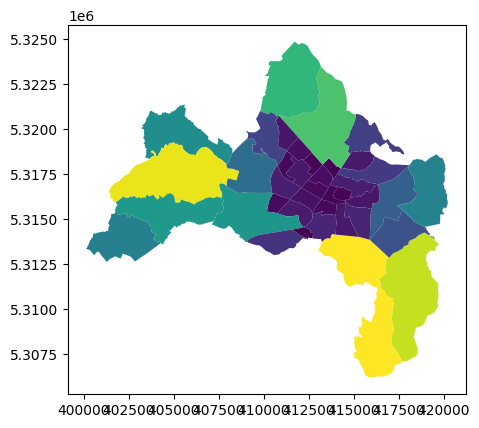

In [437]:
Stadtbezirke.plot("flaeche", legend=False)

<AxesSubplot:>

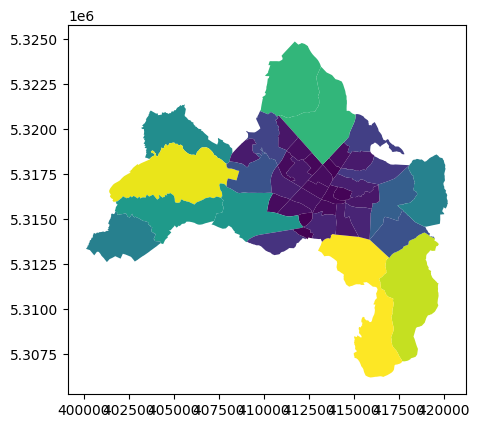

In [438]:
Stadtbezirke_old.plot("flaeche", legend=False)

<AxesSubplot:>

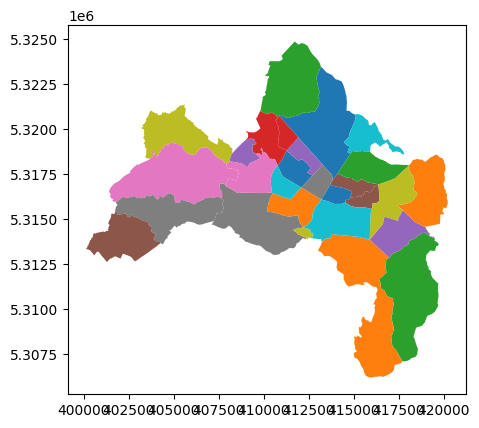

In [439]:
Stadtteile.plot("name", legend=False)

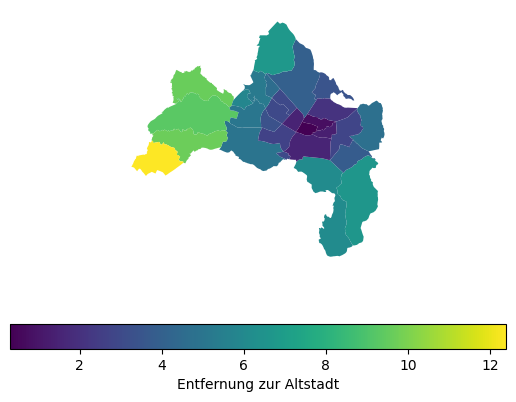

In [440]:
plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

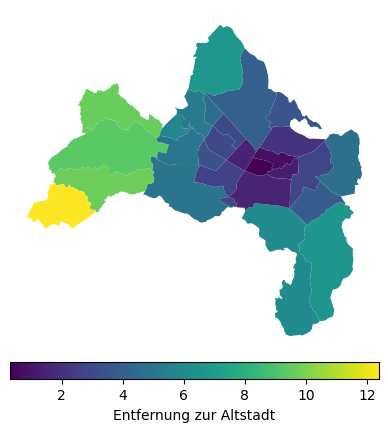

In [441]:

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("bottom", size="5%", pad=0.1)

plot=Stadtteile.plot(

    column="Entfernung",

    ax=ax,

    legend=True,

    cax=cax,

    legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"},

)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

        Jahr     Stadtbezirk Wahlart Wahlbeteiligung Briefwahlanteil  \
count   1377            1377    1377            1377            1377   
unique    22              44       3             425             367   
top     2009  Altstadt-Mitte       1            82,3            19,5   
freq     123              35     788              14              14   

       Anteil CDU Anteil SPD Anteil GRÜNE Anteil FDP Anteil LINKE Anteil AfD  \
count        1377       1377         1377       1377         1377       1377   
unique        376        398          407        154          160        109   
top          33,8       24,1         15,5          5            0          0   
freq           14         13           11         28          424       1062   

       Erst-/Zweitstimmen  
count                1377  
unique                  2  
top                     2  
freq                  983  
4
5
6
7
8
9
10
              Jahr      Wahlart  Briefwahlanteil   Anteil CDU   Anteil SPD  \
count

/tmp/ipykernel_10059/1445259576.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wahl2.iloc[:,i]=wahl2.iloc[:,i].str.replace(",",".").astype(float)
/tmp/ipykernel_10059/1445259576.py:18: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bev.iloc[:,i]=bev.iloc[:,i].astype(int,errors='ignore')
/tmp/ipykernel_10059/1445259576.py:16: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns a

              Jahr  Summe Altersjahre (für Durchschnittsberechnung)  \
count  1401.000000                                      1401.000000   
mean   2004.687366                                    194758.098858   
std       9.781435                                    100829.123056   
min    1988.000000                                      1428.500000   
25%    1996.000000                                    116841.000000   
50%    2005.000000                                    186984.500000   
75%    2013.000000                                    262344.500000   
max    2021.000000                                    458660.500000   

       Summe Wohndauer in Tagen (für Durchschnittsberechnung)  \
count                                         252.000000        
mean                                        53495.067460        
std                                         26959.138517        
min                                           560.000000        
25%                                

/tmp/ipykernel_10059/1445259576.py:24: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  soz.iloc[:,i]=soz.iloc[:,i].fillna(0).astype(int)


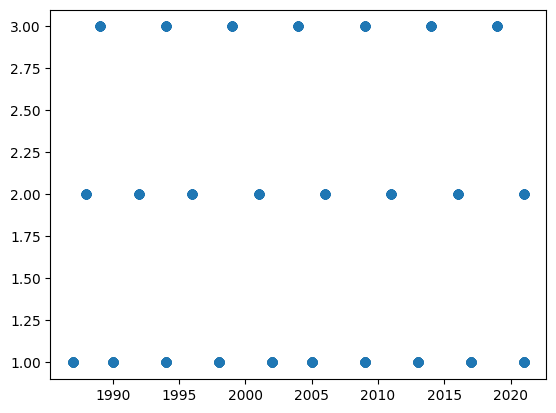

In [442]:
wahl2=pd.read_csv("de-bw-freiburg-wahlergebnisse_bundestags_landtags-_und_europawahl_stadtbezirke_zeitreihe.csv",dtype=str,sep=';')
print(wahl2.describe())
wahl2.Jahr=wahl2.Jahr.astype(int)
wahl2['Erst-/Zweitstimmen']=wahl2['Erst-/Zweitstimmen'].astype(int)
wahl2.Wahlart=wahl2.Wahlart.astype(int)
for i in range(4,wahl2.shape[1]-1):
    print(i)
    wahl2.iloc[:,i]=wahl2.iloc[:,i].str.replace(",",".").astype(float)
print(wahl2.describe()) 
plt.plot(wahl2.Jahr,wahl2.Wahlart,'o')
bev=pd.read_csv("de-bw-freiburg-grunddaten_fuer_indikatoren_stadtbezirke_-_bevoelkerungsbestand.csv",dtype=str)
print(bev.describe())
for i in range(bev.shape[1]):
    print(i)
    if i==2 or i==3:
        bev.iloc[:,i]=bev.iloc[:,i].str.replace(",",".").astype(float)
    elif i!=1:    
        bev.iloc[:,i]=bev.iloc[:,i].astype(int,errors='ignore')
print(bev.describe())  
soz=pd.read_csv("de-bw-freiburg-grunddaten_fuer_indikatoren_stadtbezirke_-_soziales.csv",dtype=str)
soz.Jahr=soz.Jahr.astype(int)
for i in range(2,soz.shape[1]):
    print(i)
    soz.iloc[:,i]=soz.iloc[:,i].fillna(0).astype(int)
print(soz.describe())  

In [443]:
bevdic={'Jahr':'Jahr', 'Stadtbezirk':'Stadtbezirk',
       'Summe Altersjahre (für Durchschnittsberechnung)':'summe_alter',
       'Summe Wohndauer in Tagen (für Durchschnittsberechnung)':'summe_tage',
       'Anzahl Einwohner_innen':"einwohner", 'Anzahl Einwohner_innen Vorjahr':"einwohner_vorjahr",
       'Anzahl Einwohner_innen unter 3 Jahre':"einwohner_u3",
       'Anzahl Einwohner_innen unter 6 Jahre':"einwohner_u6",
       'Anzahl Einwohner_innen unter 15 Jahre':"einwohner_u15",
       'Anzahl Einwohner_innen unter 18 Jahre':"einwohner_u18",
       'Anzahl Einwohner_innen unter 25 Jahre':"einwohner_u25",
       'Anzahl Einwohner_innen 0 bis unter 65 Jahre':"einwohner_u65",
       'Anzahl Einwohner_innen 3 bis unter 6 Jahre':"einwohner_3_6",
       'Anzahl Einwohner_innen 6 bis unter 10 Jahre':"einwohner_6_10",
       'Anzahl Einwohner_innen 10 bis unter 15 Jahre':"einwohner_10_15",
       'Anzahl Einwohner_innen 15 bis unter 50 Jahre':"einwohner_10_50",
       'Anzahl Einwohner_innen 15 bis unter 65 Jahre':"einwohner_15_65",
       'Anzahl Einwohner_innen 15 bis unter 65 Jahre, weiblich':"einwohner_15_65_w",
       'Anzahl Einwohner_innen 15 bis unter 65 Jahre, männlich':"einwohner_15_65_m",
       'Anzahl Einwohner_innen 15 bis unter 65 Jahre, deutsch':"einwohner_15_65_d",
       'Anzahl Einwohner_innen 15 bis unter 65 Jahre, nicht-deutsch':"einwohner_15_65_d",
       'Anzahl Einwohner_innen 60 bis unter 80 Jahre':"einwohner_60_80",
       'Anzahl Einwohner_innen 50 Jahre und älter':"einwohner_50p",
       'Anzahl Einwohner_innen 65 Jahre und älter':"einwohner_65p",
       'Anzahl Einwohner_innen 80 Jahre und älter':"einwohner_80p",
       'Anzahl Frauen 15 bis unter 45 Jahren':"einwohner_15_45_w",
       'Anzahl Einwohner_innen männlich':"einwohner_m", 'Anzahl Einwohner_innen weiblich':"einwohner_w",
       'Anzahl Einwohner_innen deutsch':"einwohner_d",
       'Anzahl Einwohner_innen nicht-deutsch':"einwohner_nd",
       'Anzahl Einwohner_innen EU-Ausland':"einwohner_eu",
       'Anzahl Einwohner_innen Nicht-EU-Ausland':"einwohner_neu",
       'Anzahl Einwohner_innen inkl. Nebenwohnsitzen':"einwohner_pneben"}
bev.rename(columns=bevdic,inplace=True)

In [444]:
comb=pd.merge(wahl2,bev,how='inner',left_on=['Jahr',"Stadtbezirk"],right_on=['Jahr',"Stadtbezirk"])

(170, 9)


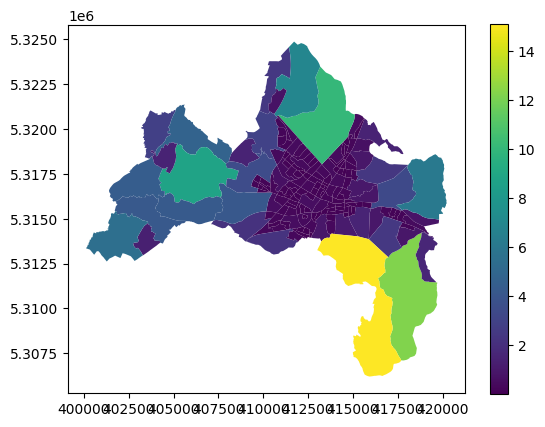

In [445]:
stat_bezirke.plot("Flaeche", legend=True)
print(stat_bezirke.shape)

<AxesSubplot:>

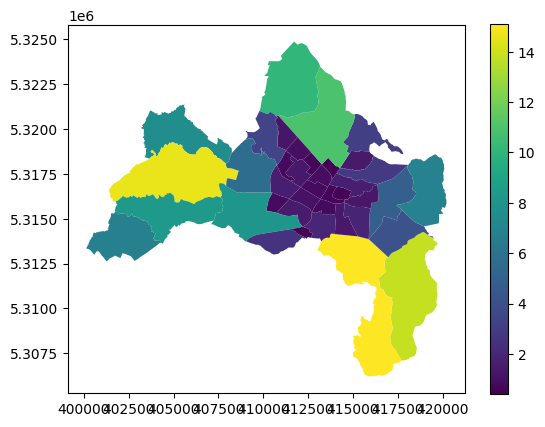

In [446]:
Stadtbezirke.plot("flaeche", legend=True)

In [447]:
wahllokale=pd.read_csv("opendata-wahllokale.csv",sep=';')
print(wahllokale.describe())
print(wahllokale.head())
print(wahllokale[(wahllokale['Bezirk-Art']=='W')].describe())

             ags
count      247.0
mean   8311000.0
std          0.0
min    8311000.0
25%    8311000.0
50%    8311000.0
75%    8311000.0
max    8311000.0
        datum      ags Bezirk-Nr Bezirk-Name Bezirk-Art  \
0  09.06.2024  8311000    111-01      111-01          W   
1  09.06.2024  8311000    111-02      111-02          W   
2  09.06.2024  8311000    111-03      111-03          W   
3  09.06.2024  8311000    112-01      112-01          W   
4  09.06.2024  8311000    112-02      112-02          W   

                                Wahlraum-Bezeichnung  \
0                           Volkshochschule Freiburg   
1                           Volkshochschule Freiburg   
2                           Volkshochschule Freiburg   
3  Walther-Rathenau-/Richard-Fehrenbach, Gewerbes...   
4  Walther-Rathenau-/Richard-Fehrenbach, Gewerbes...   

                   Wahlraum-Adresse Wahlraum-Barrierefrei  \
0    Rotteckring 12, 79098 Freiburg                    ja   
1    Rotteckring 12, 79098 Freibu

In [448]:
def apply_substring(dat):
    return dat[0:3]+dat[5:6]

In [449]:
print(wahllokale['Bezirk-Nr'][0:59])
wahllokale['nr']=wahllokale['Bezirk-Nr'].apply(apply_substring).astype(float)
print(wahllokale['nr'][0:59])
print(stat_bezirke.loc[0:59,['nr','gid']])

0     111-01
1     111-02
2     111-03
3     112-01
4     112-02
5     120-01
6     120-02
7     120-03
8     211-01
9     211-03
10    211-04
11    211-05
12    212-01
13    212-02
14    212-03
15    212-04
16    220-01
17    220-02
18    220-03
19    220-04
20    220-05
21    220-06
22    231-01
23    231-02
24    231-03
25    231-04
26    231-05
27    231-06
28    233-01
29    240-01
30    240-02
31    240-03
32    310-01
33    310-03
34    310-04
35    310-05
36    320-01
37    320-02
38    320-03
39    320-04
40    320-05
41    330-01
42    330-02
43    340-01
44    340-02
45    410-01
46    410-03
47    410-04
48    410-05
49    421-01
50    421-02
51    421-04
52    421-05
53    421-06
54    422-01
55    422-02
56    422-03
57    422-04
58    423-01
Name: Bezirk-Nr, dtype: object
0     1111.0
1     1112.0
2     1113.0
3     1121.0
4     1122.0
5     1201.0
6     1202.0
7     1203.0
8     2111.0
9     2113.0
10    2114.0
11    2115.0
12    2121.0
13    2122.0
14    2123.0
15    2

In [450]:
print(stat_bezirke.describe())

                nr         gid       flaeche        umfang     Flaeche  \
count   169.000000  170.000000  1.700000e+02    170.000000  170.000000   
mean   4586.289941   85.500000  9.004187e+05   3612.501744    0.899698   
std    1698.163947   49.218899  2.065118e+06   3898.706651    2.063466   
min    1111.000000    1.000000  1.082337e+03    201.927986    0.001081   
25%    3202.000000   43.250000  1.085168e+05   1528.007777    0.108430   
50%    5133.000000   85.500000  2.010877e+05   2013.576379    0.200927   
75%    6127.000000  127.750000  4.476665e+05   3781.155146    0.447308   
max    6804.000000  170.000000  1.510341e+07  26520.061189   15.091327   

       Entfernung  
count  170.000000  
mean     3.175427  
std      2.252884  
min      0.194085  
25%      1.607331  
50%      2.804037  
75%      4.076052  
max     12.675991  


Finde den Bezirk der nan as nr hat. 

In [451]:
print(stat_bezirke[(stat_bezirke.nr.isna())])
sel=stat_bezirke[(stat_bezirke.nr.isna())].loc[:,['centroid']]
print(sel)
selnan=stat_bezirke[(stat_bezirke.nr.isna()) | (stat_bezirke.nr>6000)]
sellow=stat_bezirke[(stat_bezirke.nr<7000)]


    nr  gid      flaeche      umfang  \
15 NaN  170  1082.336863  201.927986   

                                             geometry   Flaeche  \
15  MULTIPOLYGON (((417037.184 5306427.622, 417037...  0.001081   

                                             boundary  \
15  MULTILINESTRING ((417037.184 5306427.622, 4170...   

                          centroid  Entfernung  
15  POINT (417405.872 5314029.448)    3.845373  
                          centroid
15  POINT (417405.872 5314029.448)


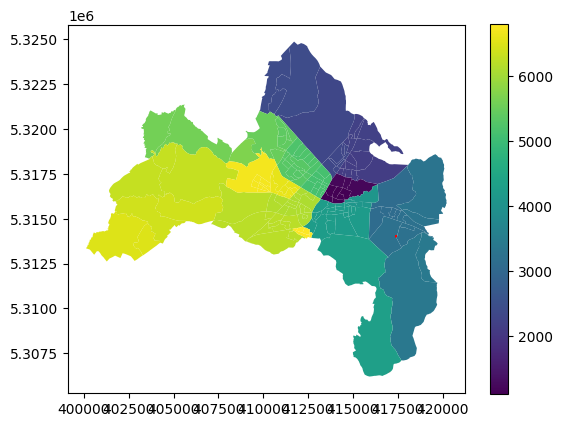

In [452]:
s_plot=stat_bezirke.plot("nr", legend=True,zorder=1,  missing_kwds={

        "color": "lightgrey",

        "edgecolor": "red",

        "hatch": "///",

        "label": "Missing values",

    },)
s_plot.plot(ax=s_plot, marker='o', color='red', markersize=15,zorder=2);

Is there, is that still a real one or one which was omitted later? 

In [393]:
print(wahllokale.nr[wahllokale.nr<7000].shape)
print(stat_bezirke.shape)

(138,)
(170, 9)


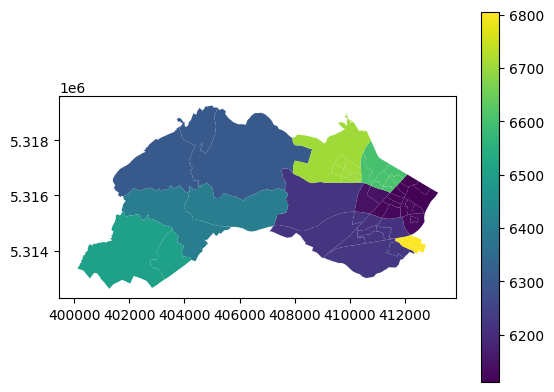

In [394]:
s_plot=selnan.plot("nr", legend=True)

In [395]:
wahllokale.set_index('nr',inplace=True)
stat_bezirke.set_index('nr',inplace=True)

In [396]:
print(wahllokale.head())
joined=stat_bezirke.join(wahllokale)

             datum      ags Bezirk-Nr Bezirk-Name Bezirk-Art  \
nr                                                             
1111.0  09.06.2024  8311000    111-01      111-01          W   
1112.0  09.06.2024  8311000    111-02      111-02          W   
1113.0  09.06.2024  8311000    111-03      111-03          W   
1121.0  09.06.2024  8311000    112-01      112-01          W   
1122.0  09.06.2024  8311000    112-02      112-02          W   

                                     Wahlraum-Bezeichnung  \
nr                                                          
1111.0                           Volkshochschule Freiburg   
1112.0                           Volkshochschule Freiburg   
1113.0                           Volkshochschule Freiburg   
1121.0  Walther-Rathenau-/Richard-Fehrenbach, Gewerbes...   
1122.0  Walther-Rathenau-/Richard-Fehrenbach, Gewerbes...   

                        Wahlraum-Adresse Wahlraum-Barrierefrei  \
nr                                                       

In [397]:
print(stat_bezirke)

        gid        flaeche       umfang  \
nr                                        
2112.0   11   51389.064666   947.080536   
2123.0   17  227461.810639  2009.029430   
2205.0   23  105762.578741  1378.809863   
2312.0   26   95630.118378  1759.126329   
2313.0   27   63347.462857  1223.285422   
...     ...            ...          ...   
6708.0  165  164857.352180  1919.767119   
6801.0  166  160557.061917  2676.137147   
6802.0  167  114194.453001  1390.509612   
6803.0  168   95471.044717  1266.848831   
6804.0  169   42591.954183   879.666597   

                                                 geometry   Flaeche  \
nr                                                                    
2112.0  POLYGON ((414434.828 5317539.457, 414450.121 5...  0.051348   
2123.0  POLYGON ((414904.546 5318063.342, 414862.476 5...  0.227280   
2205.0  POLYGON ((414781.091 5319147.012, 414771.878 5...  0.105678   
2312.0  POLYGON ((414505.953 5318563.802, 414542.869 5...  0.095554   
2313.0  POLYGO

In [398]:
print(joined)

        gid        flaeche       umfang  \
nr                                        
2112.0   11   51389.064666   947.080536   
2123.0   17  227461.810639  2009.029430   
2205.0   23  105762.578741  1378.809863   
2312.0   26   95630.118378  1759.126329   
2313.0   27   63347.462857  1223.285422   
...     ...            ...          ...   
6708.0  165  164857.352180  1919.767119   
6801.0  166  160557.061917  2676.137147   
6802.0  167  114194.453001  1390.509612   
6803.0  168   95471.044717  1266.848831   
6804.0  169   42591.954183   879.666597   

                                                 geometry   Flaeche  \
nr                                                                    
2112.0  POLYGON ((414434.828 5317539.457, 414450.121 5...  0.051348   
2123.0  POLYGON ((414904.546 5318063.342, 414862.476 5...  0.227280   
2205.0  POLYGON ((414781.091 5319147.012, 414771.878 5...  0.105678   
2312.0  POLYGON ((414505.953 5318563.802, 414542.869 5...  0.095554   
2313.0  POLYGO

In [399]:
selnan2=joined[(joined['Bezirk-Nr'].isna())]
print(selnan2.index)

Float64Index([2112.0, 2332.0, 4213.0,    nan, 5316.0, 5701.0, 6132.0, 1123.0,
              5125.0, 2321.0, 3102.0, 4102.0, 4232.0, 4234.0, 4242.0, 5134.0,
              5213.0, 5317.0, 5323.0, 5405.0, 6114.0, 6122.0, 6126.0, 6131.0,
              6213.0, 6216.0, 6219.0, 6602.0, 6607.0, 6608.0, 6702.0, 6706.0],
             dtype='float64', name='nr')


Scheint von einer anderen Wahl zu sein, nicht dieser, sind fehlende Nummern. 

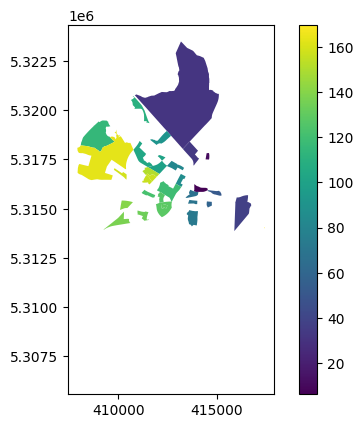

In [400]:
s_plot=selnan2.plot("gid", legend=True)

Heisst, dass die Strassen verwendet werden muessen. 

Getting the 2024  Euro files. 

In [401]:
euro24_all=pd.read_csv('eu24_summe.csv',sep=';')
euro24_stadtbezirke=pd.read_csv('eu24_stadtbezirke.csv',sep=';')
euro24_wahlbezirke=pd.read_csv('eu24_wahlbezirke.csv',sep=';')

In [402]:
print(euro24_wahlbezirke)

     Unnamed: 0       datum             wahl      ags gebiet-nr gebiet-name  \
0             0  09.06.2024  Europawahl 2024  8311000    111-01      111-01   
1             1  09.06.2024  Europawahl 2024  8311000    111-02      111-02   
2             2  09.06.2024  Europawahl 2024  8311000    111-03      111-03   
3             3  09.06.2024  Europawahl 2024  8311000    112-01      112-01   
4             4  09.06.2024  Europawahl 2024  8311000    112-02      112-02   
..          ...         ...              ...      ...       ...         ...   
242         242  09.06.2024  Europawahl 2024  8311000    938-03      938-03   
243         243  09.06.2024  Europawahl 2024  8311000    938-04      938-04   
244         244  09.06.2024  Europawahl 2024  8311000    939-01      939-01   
245         245  09.06.2024  Europawahl 2024  8311000    939-02      939-02   
246         246  09.06.2024  Europawahl 2024  8311000    939-03      939-03   

     max-schnellmeldungen  anz-schnellmeldungen  Wa

In [423]:
euro19=comb[(comb.Jahr==2019) & (comb.Wahlart==3)]
euro19['Anteil_sonstige']=100-euro19['Anteil CDU']-euro19['Anteil SPD']-euro19['Anteil FDP']-euro19['Anteil LINKE']-euro19['Anteil AfD']-euro19['Anteil GRÜNE']
print(euro19)

      Jahr                 Stadtbezirk  Wahlart Wahlbeteiligung  \
1260  2019              Altstadt-Mitte        3            67,4   
1261  2019               Altstadt-Ring        3            72,8   
1262  2019                     Neuburg        3            67,9   
1263  2019                 Herdern-Süd        3            77,3   
1264  2019                Herdern-Nord        3              76   
1265  2019                   Zähringen        3            69,7   
1266  2019          Brühl-Güterbahnhof        3            60,1   
1267  2019            Brühl-Beurbarung        3            56,4   
1268  2019                    Hochdorf        3            61,3   
1269  2019                     Waldsee        3            74,3   
1270  2019                Littenweiler        3            75,6   
1271  2019                       Ebnet        3            78,3   
1272  2019                      Kappel        3              75   
1273  2019                      Oberau        3            73,

/tmp/ipykernel_10059/1680356374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro19['Anteil_sonstige']=100-euro19['Anteil CDU']-euro19['Anteil SPD']-euro19['Anteil FDP']-euro19['Anteil LINKE']-euro19['Anteil AfD']-euro19['Anteil GRÜNE']


In [424]:
print(euro19.columns)

Index(['Jahr', 'Stadtbezirk', 'Wahlart', 'Wahlbeteiligung', 'Briefwahlanteil',
       'Anteil CDU', 'Anteil SPD', 'Anteil GRÜNE', 'Anteil FDP',
       'Anteil LINKE', 'Anteil AfD', 'Erst-/Zweitstimmen', 'summe_alter',
       'summe_tage', 'einwohner', 'einwohner_vorjahr', 'einwohner_u3',
       'einwohner_u6', 'einwohner_u15', 'einwohner_u18', 'einwohner_u25',
       'einwohner_u65', 'einwohner_3_6', 'einwohner_6_10', 'einwohner_10_15',
       'einwohner_10_50', 'einwohner_15_65', 'einwohner_15_65_w',
       'einwohner_15_65_m', 'einwohner_15_65_d', 'einwohner_15_65_d',
       'einwohner_60_80', 'einwohner_50p', 'einwohner_65p', 'einwohner_80p',
       'einwohner_15_45_w', 'einwohner_m', 'einwohner_w', 'einwohner_d',
       'einwohner_nd', 'einwohner_eu', 'einwohner_neu', 'einwohner_pneben',
       'Anteil_sonstige'],
      dtype='object')


In [425]:
print(bev.columns)

Index(['Jahr', 'Stadtbezirk', 'summe_alter', 'summe_tage', 'einwohner',
       'einwohner_vorjahr', 'einwohner_u3', 'einwohner_u6', 'einwohner_u15',
       'einwohner_u18', 'einwohner_u25', 'einwohner_u65', 'einwohner_3_6',
       'einwohner_6_10', 'einwohner_10_15', 'einwohner_10_50',
       'einwohner_15_65', 'einwohner_15_65_w', 'einwohner_15_65_m',
       'einwohner_15_65_d', 'einwohner_15_65_d', 'einwohner_60_80',
       'einwohner_50p', 'einwohner_65p', 'einwohner_80p', 'einwohner_15_45_w',
       'einwohner_m', 'einwohner_w', 'einwohner_d', 'einwohner_nd',
       'einwohner_eu', 'einwohner_neu', 'einwohner_pneben'],
      dtype='object')


In [426]:
Stadtbezirke.set_index('name',inplace=True)
euro19.set_index('Stadtbezirk',inplace=True)

KeyError: "None of ['name'] are in the columns"

In [405]:
joined=Stadtbezirke.join(euro19)

In [406]:
print(joined)

                               nr   gid                       bezeichnung  \
name                                                                        
Brühl-Beurbarung            233.0   9.0            233 / Brühl-Beurbarung   
Kappel                      340.0  14.0                      340 / Kappel   
Günterstal                  430.0  20.0                  430 / Günterstal   
Waltershofen                560.0  29.0                560 / Waltershofen   
Opfingen                    630.0  37.0                    630 / Opfingen   
Altstadt-Mitte              111.0   1.0              111 / Altstadt-Mitte   
Herdern-Nord                212.0   5.0                212 / Herdern-Nord   
Mooswald-Ost                522.0  24.0                522 / Mooswald-Ost   
Waldsee                     310.0  11.0                     310 / Waldsee   
Mittelwiehre                422.0  17.0                422 / Mittelwiehre   
Alt-Betzenhausen            532.0  26.0            532 / Alt-Betzenhausen   

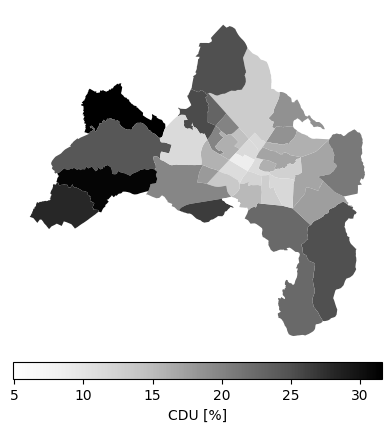

In [409]:

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
plot=joined.plot(
    column="Anteil CDU",
    ax=ax,
    legend=True,
    cax=cax,
    cmap='Greys',
    legend_kwds={"label": "CDU [%]", "orientation": "horizontal"},
)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

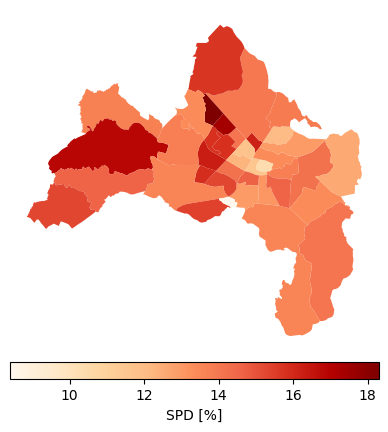

In [410]:

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
plot=joined.plot(
    column="Anteil SPD",
    ax=ax,
    legend=True,
    cax=cax,
    cmap='OrRd',
    legend_kwds={"label": "SPD [%]", "orientation": "horizontal"},
)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

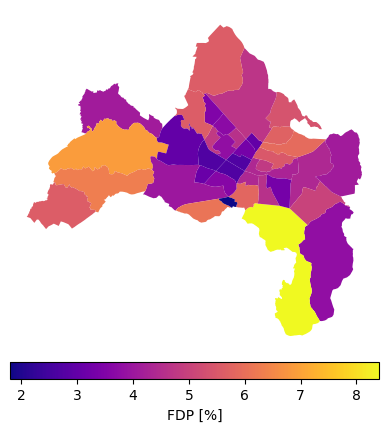

In [411]:

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
plot=joined.plot(
    column="Anteil FDP",
    ax=ax,
    legend=True,
    cax=cax,
    cmap='plasma',
    legend_kwds={"label": "FDP [%]", "orientation": "horizontal"},
)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

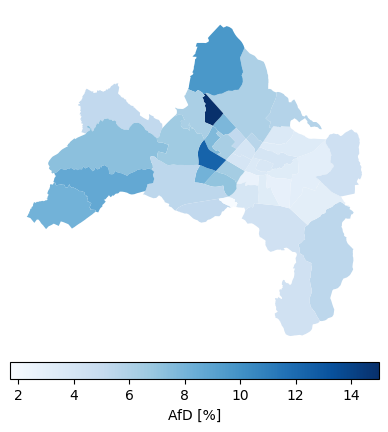

In [412]:

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
plot=joined.plot(
    column="Anteil AfD",
    ax=ax,
    legend=True,
    cax=cax,
    cmap='Blues',
    legend_kwds={"label": "AfD [%]", "orientation": "horizontal"},
)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

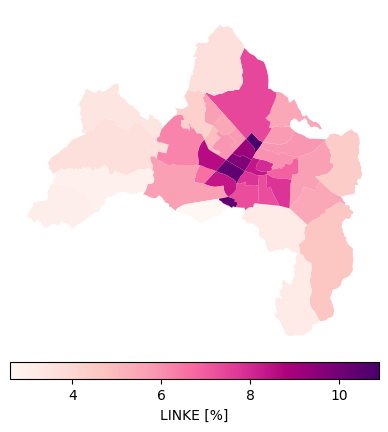

In [413]:

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
plot=joined.plot(
    column="Anteil LINKE",
    ax=ax,
    legend=True,
    cax=cax,
    cmap='RdPu',
    legend_kwds={"label": "LINKE [%]", "orientation": "horizontal"},
)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

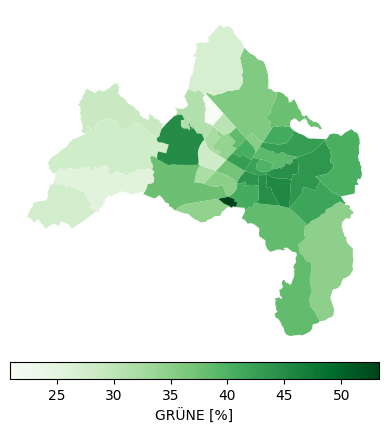

In [414]:

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
plot=joined.plot(
    column="Anteil GRÜNE",
    ax=ax,
    legend=True,
    cax=cax,
    cmap='Greens',
    legend_kwds={"label": "GRÜNE [%]", "orientation": "horizontal"},
)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

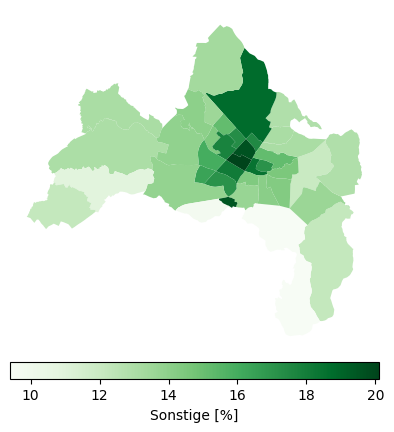

In [415]:

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
plot=joined.plot(
    column="Anteil_sonstige",
    ax=ax,
    legend=True,
    cax=cax,
    cmap='Greens',
    legend_kwds={"label": "Sonstige [%]", "orientation": "horizontal"},
)
#plot=Stadtteile.plot("Entfernung", legend=True, legend_kwds={"label": "Entfernung zur Altstadt", "orientation": "horizontal"})
plot.set_axis_off()

Sonsitige ziemlich wie Gruene, sollte genau Anteile Kriegen. 

Schildacker gibt es nicht mehr ist wohl in Gartenstadt, Mundenhof in Rieselfeld zumindest 2024. Industriegebiet
mit Gueterbahnhof in 2019, Name anders in 2024. 

In [299]:
print(euro19,Stadtbezirke)

                            Jahr  Wahlart Wahlbeteiligung  Briefwahlanteil  \
Stadtbezirk                                                                  
Altstadt-Mitte              2019        3            67,4             40.6   
Altstadt-Ring               2019        3            72,8             42.8   
Neuburg                     2019        3            67,9             45.7   
Herdern-Süd                 2019        3            77,3             38.8   
Herdern-Nord                2019        3              76             40.8   
Zähringen                   2019        3            69,7             37.9   
Brühl-Güterbahnhof          2019        3            60,1             35.8   
Brühl-Beurbarung            2019        3            56,4             34.2   
Hochdorf                    2019        3            61,3             38.3   
Waldsee                     2019        3            74,3             41.7   
Littenweiler                2019        3            75,6       

In [301]:
print(euro19.index)

Index(['Altstadt-Mitte', 'Altstadt-Ring', 'Neuburg', 'Herdern-Süd',
       'Herdern-Nord', 'Zähringen', 'Brühl-Güterbahnhof', 'Brühl-Beurbarung',
       'Hochdorf', 'Waldsee', 'Littenweiler', 'Ebnet', 'Kappel', 'Oberau',
       'Oberwiehre', 'Mittelwiehre', 'Unterwiehre-Nord', 'Unterwiehre-Süd',
       'Günterstal', 'Stühlinger-Eschholz', 'Alt-Stühlinger', 'Mooswald-West',
       'Mooswald-Ost', 'Betzenhausen-Bischofslinde', 'Alt-Betzenhausen',
       'Landwasser', 'Lehen', 'Waltershofen', 'Haslach-Egerten',
       'Haslach-Gartenstadt', 'Haslach-Haid', 'St. Georgen-Nord',
       'St. Georgen-Süd', 'Opfingen', 'Tiengen', 'Munzingen', 'Weingarten',
       'Rieselfeld', 'Vauban'],
      dtype='object', name='Stadtbezirk')


In [ ]:
arm=pd.read_csv("de-bw-freiburg-armutsgefaehrdungsquote_nach_stadtteilen.csv",dtype=str)
print(arm.describe())
arm.Jahr=arm.Jahr.astype(int)
for i in range(2,arm.shape[1]):
    print(i)
    arm.iloc[:,i]=arm.iloc[:,i].str.replace(",",".").astype(float)
arm['armutsquote']=arm['Armutsgefährdungsquote (gemessen am städt. Median) nach Stadtteilen']    
print(arm.describe)  